In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from datetime import datetime
import itertools
import gc
import pickle
import math

%matplotlib inline

In [ ]:
# 데이터 불러오기

sales = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

# 2. EDA

### 9) 상점별 판매량/ 매출 / Top20

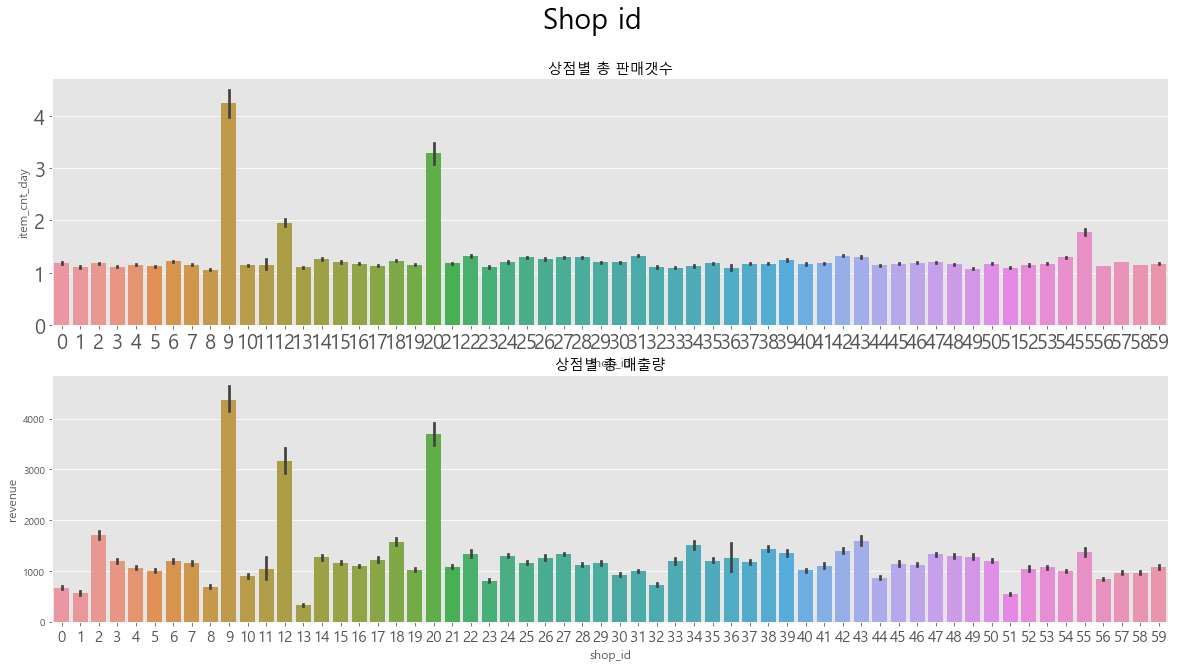

In [ ]:
train_temp = train[['shop_id', 'revenue', 'item_cnt_day']]
train_temp = pd.pivot_table(data = train,
                           index=['shop_id'], 
                            aggfunc = {'item_cnt_day':np.sum, 'revenue':np.sum}).reset_index()

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 1, figsize=(20,10))
sns.barplot(x = 'shop_id', y = 'item_cnt_day', data = train ,ax=axes[0])
axes[0].set_title('상점별 총 판매갯수')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)

sns.barplot(x = 'shop_id', y = 'revenue', data = train, ax=axes[1])
axes[1].set_title('상점별 총 매출량')
plt.suptitle('Shop id', fontsize="28")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

- shop id 31 에서 가장 많은 판매갯수와 높은 매출량

상점별 Top 20

In [ ]:
item_info = pd.merge(items, item_categories, on='item_category_id', how='inner')
train_tmp = pd.merge(sales,item_info, on='item_id', how='inner')
train = pd.merge(train_tmp, shops, on='shop_id', how='inner')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id,item_category_name,split_name,type,type_id,sub,sub_id,shop_name,city,city_id
0,2013-01-02,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"[Кино, Blu-Ray]",Кино,11,Blu-Ray,1,"Ярославль ТЦ ""Альтаир""",Ярославль,30
1,2013-05-16,4,59,2573,249.0,1.0,249.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",Музыка,13,CD локального производства,4,"Ярославль ТЦ ""Альтаир""",Ярославль,30
2,2013-01-26,0,59,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",Музыка,13,CD локального производства,4,"Ярославль ТЦ ""Альтаир""",Ярославль,30
3,2013-01-09,0,59,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",Музыка,13,CD локального производства,4,"Ярославль ТЦ ""Альтаир""",Ярославль,30
4,2013-02-24,1,59,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",Музыка,13,CD локального производства,4,"Ярославль ТЦ ""Альтаир""",Ярославль,30


In [ ]:
shop_rank = pd.DataFrame(train.shop_name.value_counts())
shop_rank.reset_index(inplace=True)
shop_rank.columns = ['shop_name', 'counts']
shop_rank.head()

,shop_name,counts
0,"Москва ТЦ ""Семеновский""",235185
1,"Москва ТРК ""Атриум""",185785
2,"Химки ТЦ ""Мега""",143123
3,"Москва ТЦ ""МЕГА Теплый Стан"" II",142018
4,"Якутск Орджоникидзе, 56",117114


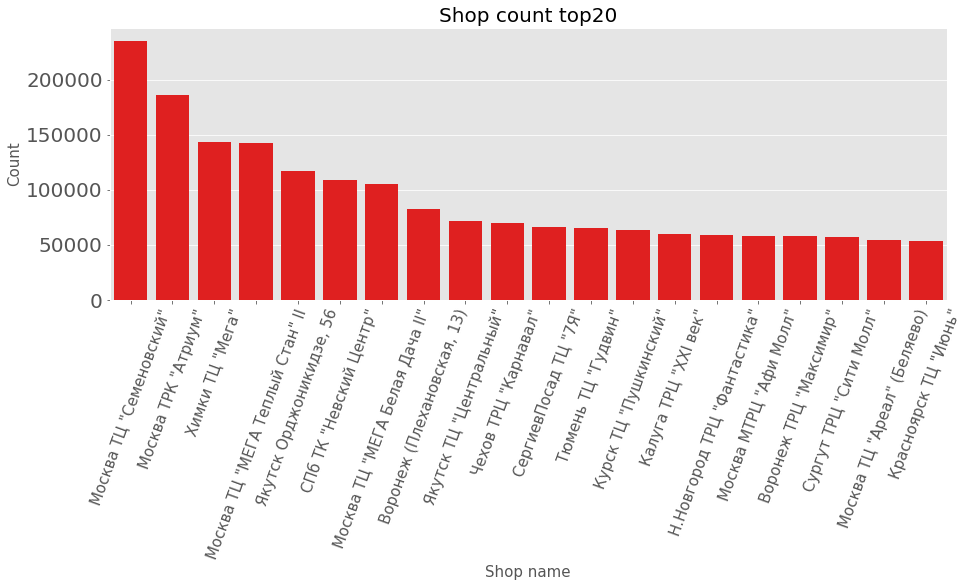

In [ ]:
fig, axes = plt.subplots(1,1,figsize = (15,5))
plt.style.use('ggplot')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

ax=sns.barplot(x='shop_name',y='counts', data=shop_rank[0:20], color='r')
ax.set_title('Shop count top20', fontsize=20)
ax.set_xlabel('Shop name', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=70, fontsize = 15)
plt.show()

### 10) 도시별 판매량 / Top 20

도시별 총 판매량

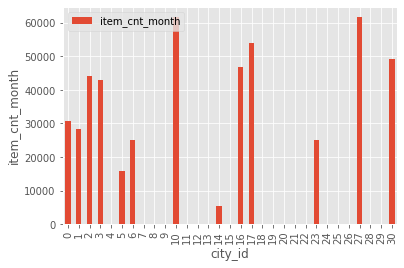

In [ ]:
# 도시별 판매개수
city_ns = matrix[['city_id','item_cnt_month']]
city_ns.set_index(['city_id'])
city_ns = city_ns.groupby(by=['city_id']).sum()
city_ns.plot(kind = 'bar')
plt.xlabel('city_id')
plt.ylabel('item_cnt_month')
plt.show()

In [ ]:
city_rank = pd.DataFrame(train.city.value_counts())
city_rank.reset_index(inplace=True)
city_rank.columns = ['city', 'counts']
city_rank.head()

,city,counts
0,Москва,994693
1,Якутск,203917
2,СПб,148072
3,Воронеж,143785
4,Химки,143123


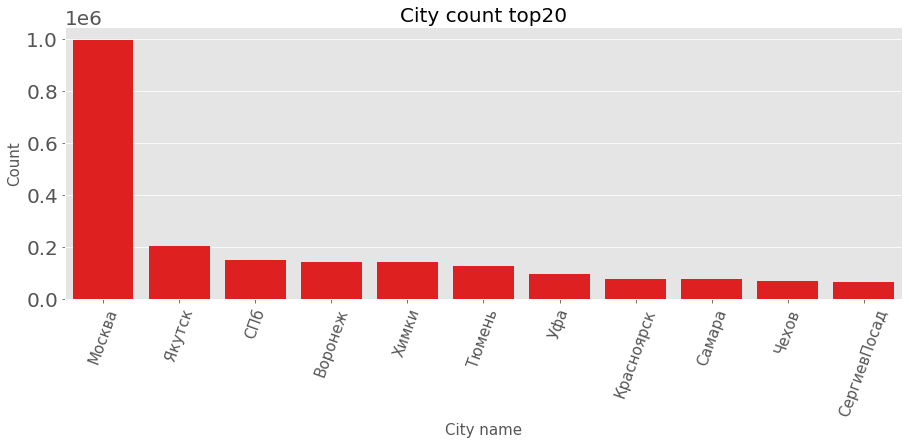

In [ ]:
fig, axes = plt.subplots(1,1,figsize = (15,5))
plt.style.use('ggplot')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

ax=sns.barplot(x='city',y='counts', data=city_rank[:11], color='r')
ax.set_title('City count top20', fontsize=20)
ax.set_xlabel('City name', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=70, fontsize = 15)
plt.show()

### 11) 계절별 시각화

Russian seasons  
Spring - March, April, May  
Summer - June to August  
Autumn - Sept to Nov  
Winter - Dec to Feb

In [ ]:
def seasons(i):
    if i in [3,4,5]:
        return 'spring'
    elif i in [6,7,8]:
        return 'summer'
    elif i in [9,10,11]:
        return 'autumn'
    else:
        return 'winter'
    
train['season'] = train['month'].apply(seasons)

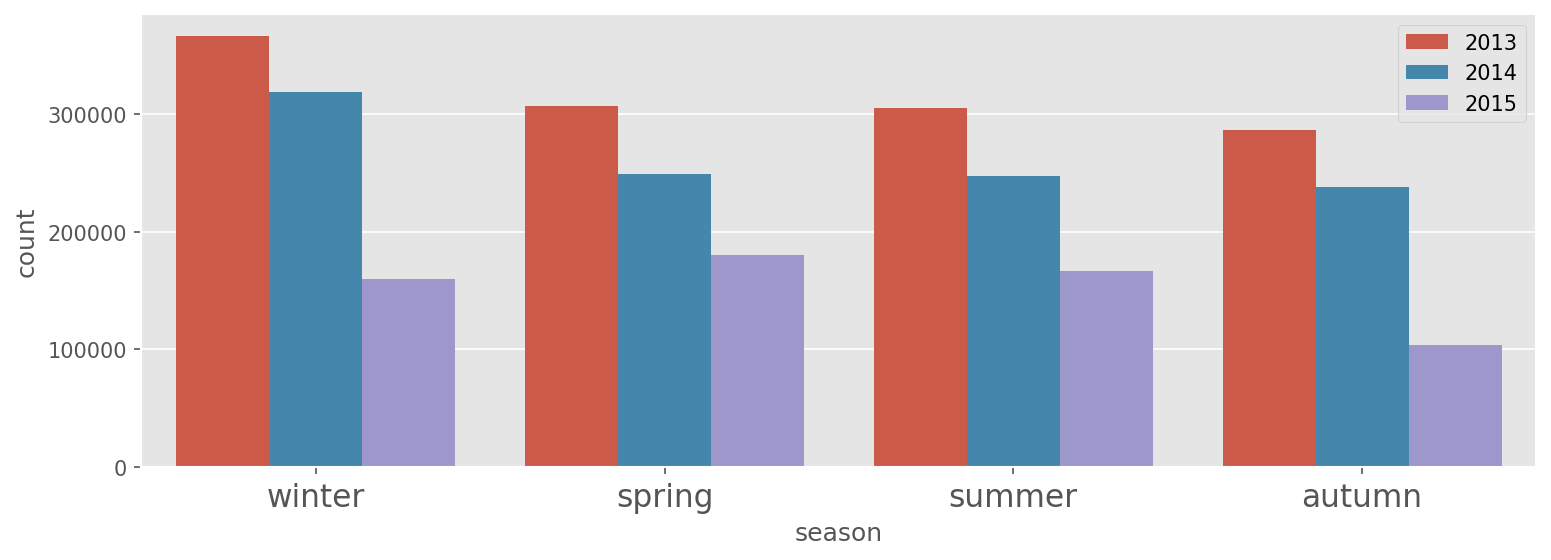

In [ ]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(x='season',data=train,hue='year')
plt.legend(loc='best')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

### 12) 요일별 시각화

In [ ]:
train['weekday'] = train['date'].dt.dayofweek

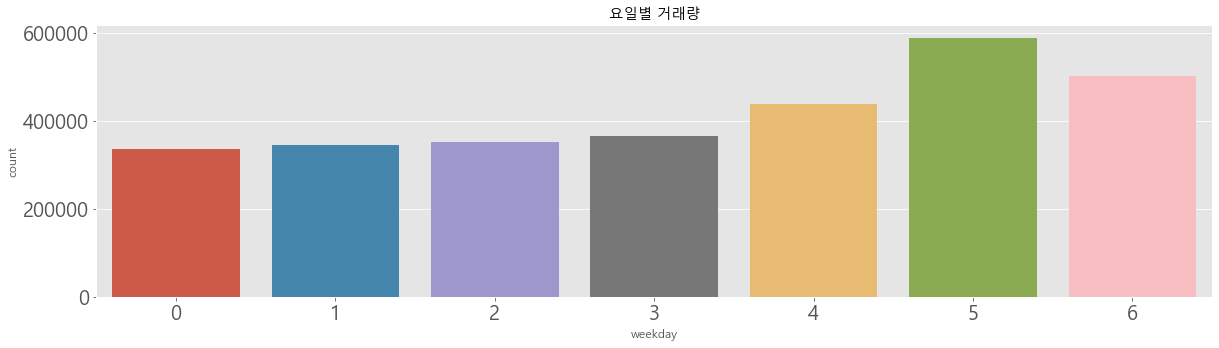

In [ ]:
plt.figure(figsize=(20,5))
plt.title('요일별 거래량')
sns.countplot(data=train.sort_values(by='weekday'), x="weekday")
plt.show()
# 토요일에 거래량이 다른 날보다 많다.

### 13) 상점 영업 확인

In [ ]:
train['day_of_month'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.day_of_week

train_temp = train[['date_block_num', 'shop_id', 'item_cnt_day']]
train_temp.groupby(by='date_block_num').aggregate({'shop_id' : 'nunique'}).reset_index()

train_temp = train[['date_block_num', 'shop_id', 'item_cnt_day']]
pivot_month = pd.pivot_table(index='date_block_num', data = train_temp,
                            columns = 'shop_id', aggfunc='sum').reset_index(drop=True)
pivot_month = pivot_month.item_cnt_day
pivot_month.columns.name = 'Month'
pivot_month

Month,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,5578.0,2947.0,1149.0,767.0,2117.0,NaN,3699.0,2498.0,1463.0,NaN,...,3414.0,2748.0,1819.0,2071.0,9407.0,NaN,3262.0,NaN,NaN,2026.0
1,6127.0,3364.0,489.0,801.0,2034.0,878.0,4015.0,2515.0,1156.0,NaN,...,3057.0,2284.0,1742.0,1915.0,8088.0,NaN,2663.0,NaN,NaN,1906.0
2,NaN,NaN,756.0,959.0,2069.0,1357.0,4528.0,2464.0,982.0,NaN,...,3617.0,2605.0,2035.0,2371.0,9505.0,NaN,3110.0,6595.0,3779.0,2032.0
3,NaN,NaN,585.0,647.0,287.0,1008.0,3173.0,1541.0,NaN,NaN,...,2744.0,1945.0,1447.0,1517.0,6735.0,NaN,2156.0,5509.0,2841.0,1390.0
4,NaN,NaN,553.0,718.0,1211.0,1111.0,3025.0,1648.0,NaN,NaN,...,2840.0,2243.0,1487.0,1774.0,7017.0,852.0,2147.0,5245.0,2313.0,1378.0
5,NaN,NaN,832.0,787.0,1464.0,1395.0,3853.0,2089.0,NaN,NaN,...,3763.0,2200.0,1816.0,2130.0,8104.0,728.0,3111.0,6003.0,2976.0,1711.0
6,NaN,NaN,808.0,728.0,1384.0,1268.0,3368.0,2032.0,NaN,NaN,...,3246.0,2273.0,1618.0,1979.0,7231.0,795.0,3303.0,5836.0,3126.0,1747.0
7,NaN,NaN,878.0,891.0,1718.0,1514.0,3708.0,2399.0,NaN,NaN,...,3723.0,2142.0,1773.0,2371.0,7831.0,719.0,3319.0,5419.0,2874.0,2052.0
8,NaN,NaN,949.0,1031.0,1536.0,1299.0,4222.0,2600.0,NaN,NaN,...,3658.0,1903.0,2129.0,2445.0,7834.0,812.0,2832.0,5218.0,2738.0,2012.0
9,NaN,NaN,797.0,797.0,1485.0,1269.0,3684.0,2240.0,NaN,6529.0,...,3528.0,1809.0,1967.0,2249.0,6694.0,916.0,2382.0,5693.0,3028.0,1753.0


- 모든 기간동안 60개의 상점들이 영업을 하는 것은 아님
- 예를 들어 shop id 9번 상점은 9번째, 21번째, 33번째 월만 영업함

### 14) 시계열
- 평균판매량 변동 파악
- 일별 총 판매량
- 일별 평균 판매량

In [ ]:
df_ = pd.pivot_table(data = train,
                           index=['date'], 
                            aggfunc = {'item_cnt_day':np.mean}).reset_index()
df_.columns = ['date','item_cnt_mean_day']

In [ ]:
df_['item_cnt_mean_diff']= df_['item_cnt_mean_day'].diff()
df_['_shift'] = df_['item_cnt_mean_day'].shift(1)
df_['변동율'] = df_['item_cnt_mean_diff'] / df_['_shift'] * 100
df_.head()

,date,item_cnt_mean_day,item_cnt_mean_diff,_shift,변동율
0,2013-01-01,1.176188,NaN,NaN,NaN
1,2013-01-02,1.231299,0.055111,1.176188,4.685563
2,2013-01-03,1.185917,-0.045382,1.231299,-3.685685
3,2013-01-04,1.178730,-0.007187,1.185917,-0.605997
4,2013-01-05,1.149548,-0.029182,1.178730,-2.475740


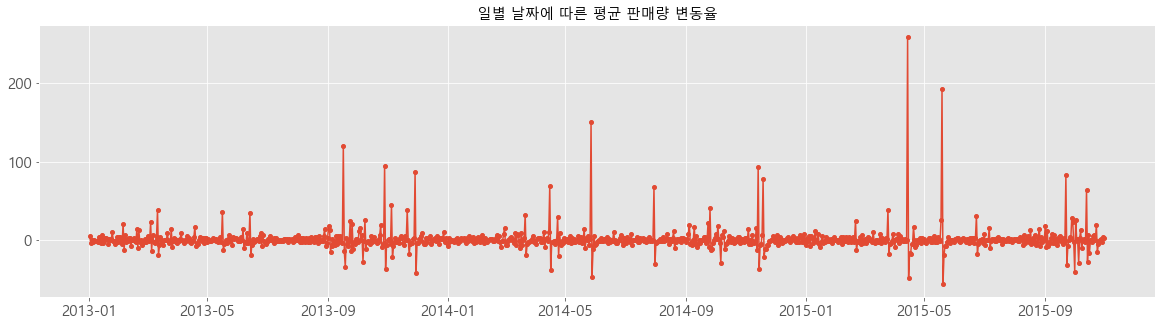

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(df_['date'],df_['변동율'], marker='o', markersize=4, linestyle='-', label='변동율')
plt.title('일별 날짜에 따른 평균 판매량 변동율')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.legend()
plt.show()

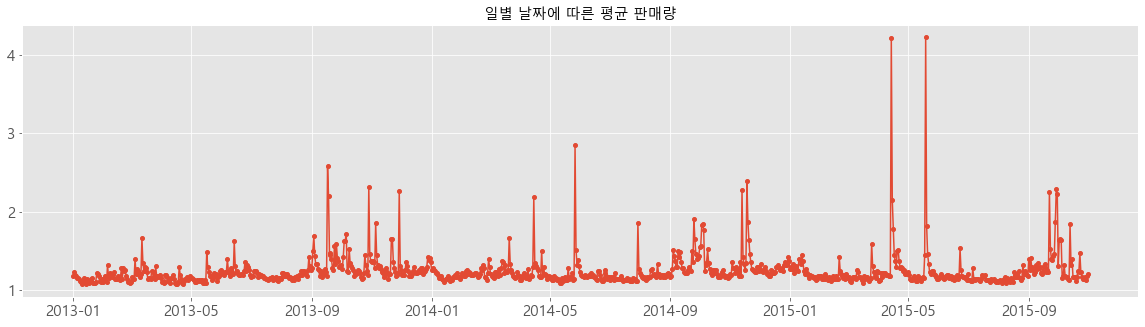

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(df_['date'],df_['item_cnt_mean_day'], marker='o', markersize=4, linestyle='-', label='변동율')
plt.title('일별 날짜에 따른 평균 판매량')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.legend()
plt.show()

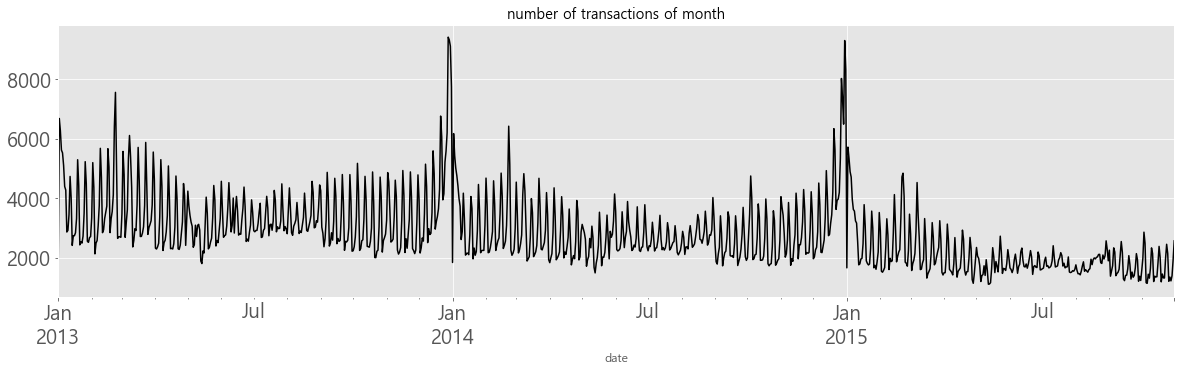

In [ ]:
#일별 거래수
sale_day =  train.groupby('date')['item_cnt_day'].count()
sale_day

plt.figure(figsize=(20,5))
sale_day.plot(title = 'number of transactions of month', color = 'black')
plt.show()

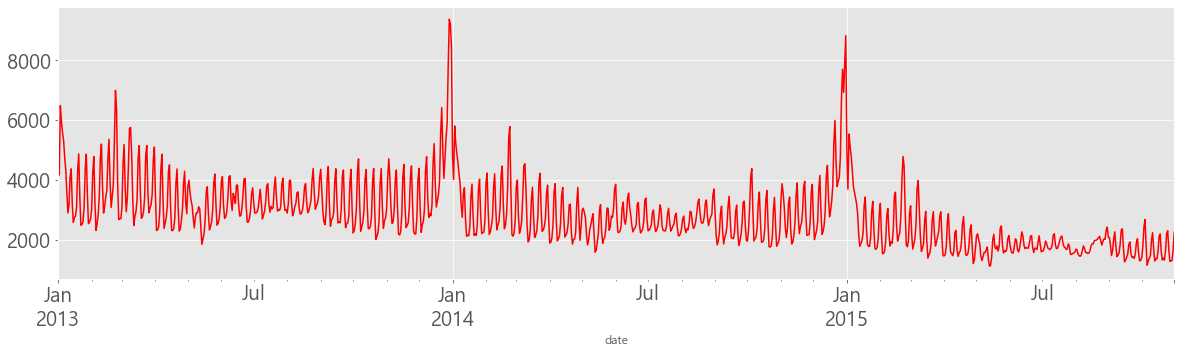

In [ ]:
# rolling : 이동평균 구할 때 사용
r = sale_day.rolling(window = 2)
plt.figure(figsize=(20,5))
r.mean().plot(style = 'r')
plt.show()

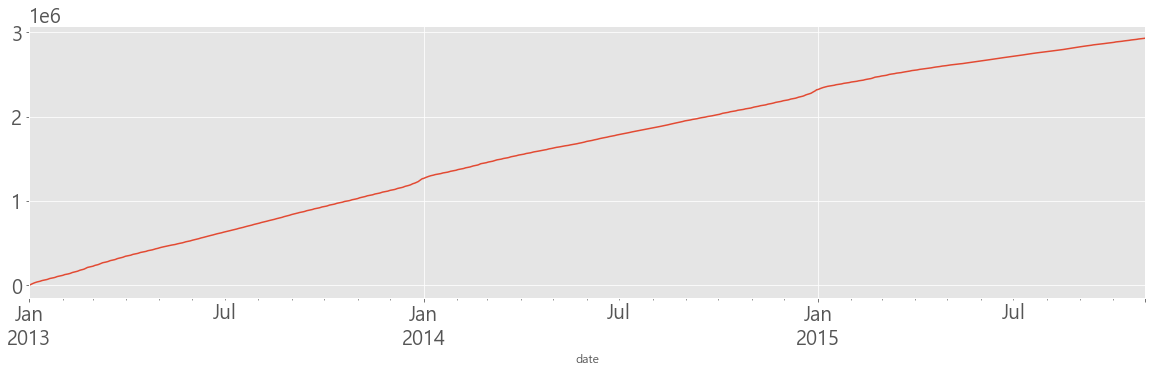

In [ ]:
plt.figure(figsize=(20,5))
sale_day = sale_day.cumsum() # 누적합
sale_day.plot()
plt.show()

In [ ]:
df_.set_index('date', inplace = True)

In [ ]:
df_2 = df_['item_cnt_mean_day']

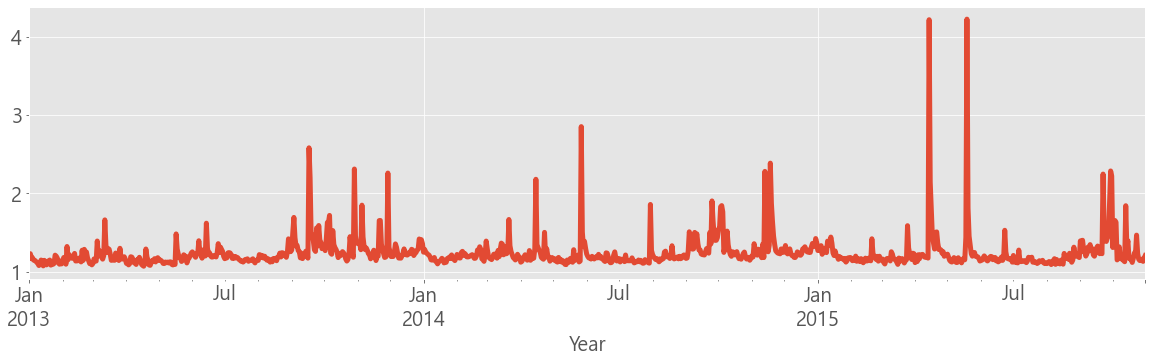

In [ ]:
# 일별 평균 거래수
df_2.plot(figsize = (20, 5), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

Text(0.5, 0, 'Year')

<Figure size 720x576 with 0 Axes>

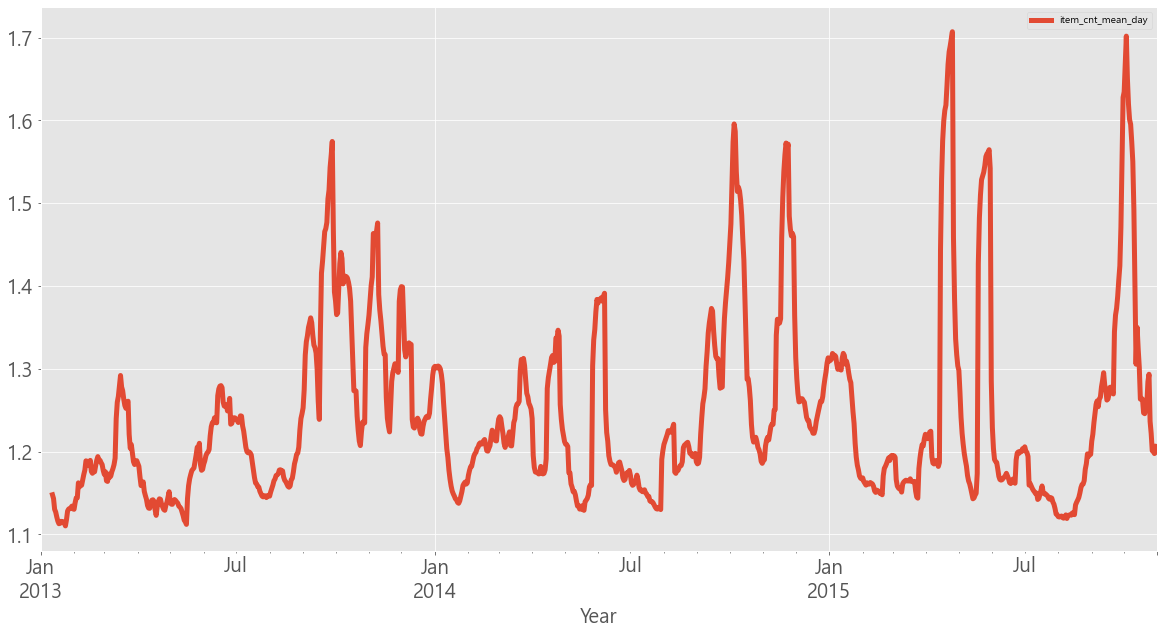

In [ ]:
# 12 사이즈 이동평균
item_cnt_mean_day = df_[['item_cnt_mean_day']]
plt.figure(figsize=(10,8))
item_cnt_mean_day.rolling(12).mean().plot(figsize = (20, 10), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20)

시계열 안정성 테스트(ADF, Augmented Dickey-Fuller)
- 귀무가설: 시계열이 안정적이지 않음
- 대립가설: 시계열이 안정적

In [ ]:
monthly_ts = train.groupby(["date_block_num"])["revenue","item_cnt_day"].sum()

<ipython-input-220-d8d8d0619e9c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_ts = train.groupby(["date_block_num"])["revenue","item_cnt_day"].sum()


In [ ]:
from statsmodels.tsa.stattools import adfuller
print('ADF testing ...')
print(f"p-value[revenue] : {adfuller(monthly_ts['revenue'].values, autolag='AIC', regression = 'ct')[1]}")
print(f"p-value[item_cnt_day] : {adfuller(monthly_ts['item_cnt_day'].values, autolag='AIC', regression = 'ct')[1]}")

# item_cnt_day의 p-value > 0.05 : 시계열이 안정적이지 않음
# revenue의 p-value > 0.05 : 시계열이 안정적이지 않음

ADF testing ...
p-value[revenue] : 0.1110115935331763
p-value[item_cnt_day] : 3.6833468087360775e-06


시계열 트렌드
- revenue와 item count 모두 seasonality 갖고있음
- item count는 일관성있게 감소하는 추세, revenue는 중간까지 증가하다가 다시 감소

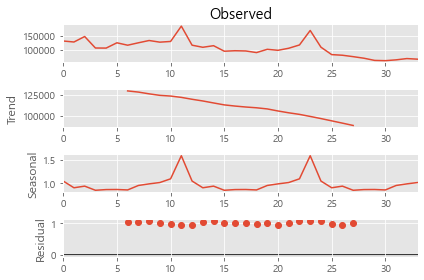

In [ ]:
item_cnt_dec = sm.tsa.seasonal_decompose(monthly_ts["item_cnt_day"].values,period=12,model="multiplicative").plot()

<Figure size 576x1728 with 0 Axes>

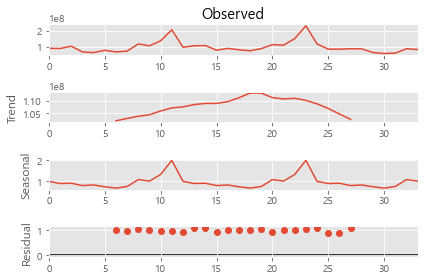

In [ ]:
plt.figure(figsize=(8,24))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sales_dec = sm.tsa.seasonal_decompose(monthly_ts["revenue"].values,period=12,model="multiplicative").plot()

주기성
- 연마다 주기성을 확인할 수 있음

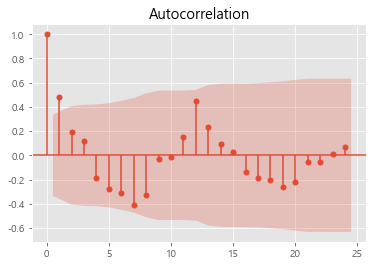

In [ ]:
sales_acf = sm.graphics.tsa.plot_acf(monthly_ts["revenue"].values, lags=24)

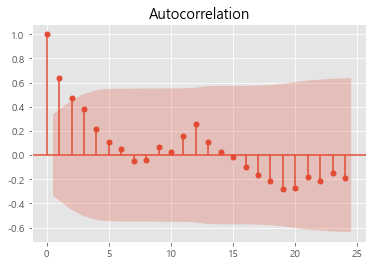

In [ ]:
item_cnt_acf = sm.graphics.tsa.plot_acf(monthly_ts["item_cnt_day"].values, lags=24)